## Подключение модулей

In [811]:
import pandas as pd   
import seaborn as sns    
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [814]:
df = pd.read_csv('complete.csv', on_bad_lines="skip")

In [815]:
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Описание данных

- **datetime** - Дата и время наблюдения явления.
- **city** - Город, в котором было зафиксировано наблюдение.
- **state** - Штат или регион, где находится город.
- **country** - Страна, где зафиксировано наблюдение.
- **shape** - Форма наблюдаемого объекта.
- **duration (seconds)** - Продолжительность наблюдаемого явления в секундах.
- **duration (hours/min)** - Продолжительность в часах и минутах.
- **comments** - Дополнительные комментарии или описания наблюдения.
- **date posted** - Дата публикации записи о наблюдении.
- **latitude** - Географическая широта места наблюдения.
- **longitude** - Географическая долгота места наблюдения.

In [818]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [868]:
df.shape

(88679, 12)

In [819]:
df.describe()

,longitude
count,88679.000000
mean,-85.021836
std,41.421744
min,-176.658056
25%,-112.073333
50%,-87.650000
75%,-77.769738
max,178.441900


In [870]:
df.describe(include='object')

,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude
count,88679,88679,88679,88679,88679,88679,88679,88679,88679
unique,22018,68,5,29,732,9791,88283,317,25428
top,seattle,ca,us,light,300,5 minutes,Fireball,12/12/2009,0
freq,570,17858,82658,20794,6474,7815,47,1624,1155


In [821]:
# выводим типы данных
df.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [823]:
# вывод названий колонок
df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude'],
      dtype='object')

In [824]:
# Проверка на дублирующие записи
df.duplicated().sum()

0

In [825]:
# Проверка на пустые записи
df.isna().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
dtype: int64

## Предобработка данных

In [827]:
# Заполнение пустых данных
df['state'] = df['state'].fillna(df['state'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['shape'] = df['shape'].fillna(df['shape'].mode()[0])
df['duration (seconds)'] = df['duration (seconds)'].fillna(df['duration (seconds)'].mode()[0])
df['duration (hours/min)'] = df['duration (hours/min)'].fillna(df['duration (hours/min)'].mode()[0])
df['comments'] = df['comments'].fillna(df['comments'].mode()[0])

In [828]:
# Повторная проверка на пустые записи
df.isna().sum()

datetime                0
city                    0
state                   0
country                 0
shape                   0
duration (seconds)      0
duration (hours/min)    0
comments                0
date posted             0
latitude                0
longitude               0
dtype: int64

In [830]:
#Проверка на некорретное время
temp_datetime = pd.to_datetime(df['datetime'], errors='coerce')
invalid_datetime = df[temp_datetime.isna()]
invalid_datetime['datetime']

166      10/10/2005 24:00
316      10/11/1994 24:00
417      10/11/2006 24:00
487      10/11/2012 24:00
567       10/1/1972 24:00
               ...       
88077      9/7/2007 24:00
88116      9/7/2010 24:00
88144      9/7/2012 24:00
88252      9/8/2003 24:00
88405      9/8/2012 24:00
Name: datetime, Length: 1220, dtype: object

In [831]:
df['datetime'] = df['datetime'].str.replace('24:00', '00:00', regex=False)

In [834]:
#Повторная проверка на корретность времени
temp_datetime = pd.to_datetime(df['datetime'], errors='coerce')
invalid_datetime = df[temp_datetime.isna()]
invalid_datetime['datetime']

Series([], Name: datetime, dtype: object)

## Разведочный анализ данных

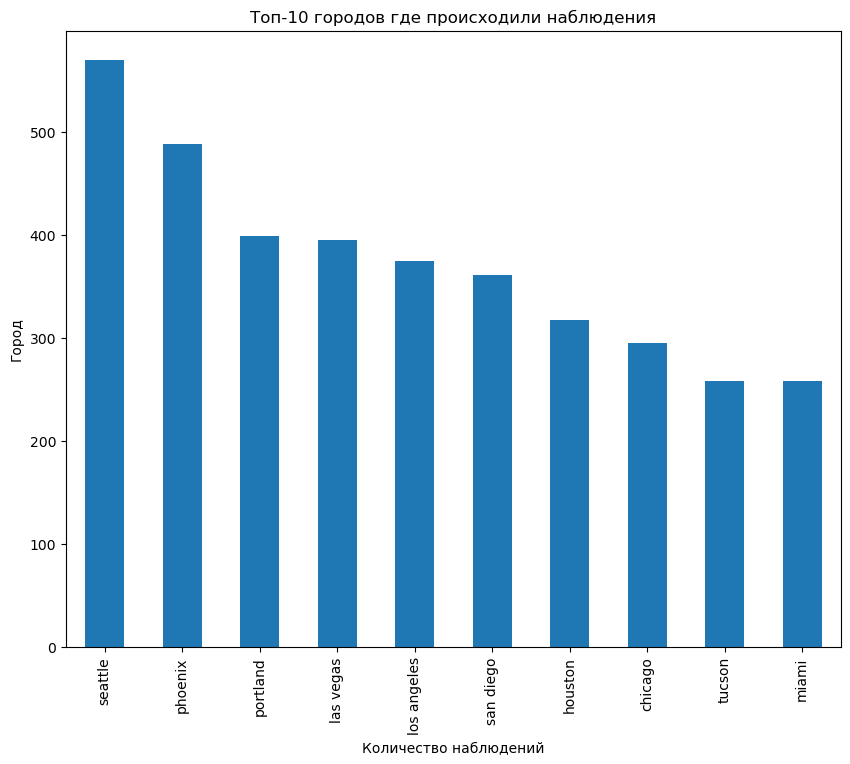

In [836]:
df['city'].value_counts().head(10).plot(kind='bar',figsize=(10,8))
plt.title('Топ-10 городов где происходили наблюдения')
plt.xlabel('Количество наблюдений')
plt.ylabel('Город')
plt.show()

In [837]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year

In [840]:
year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['year', 'count']
year_counts = year_counts.sort_values('year')

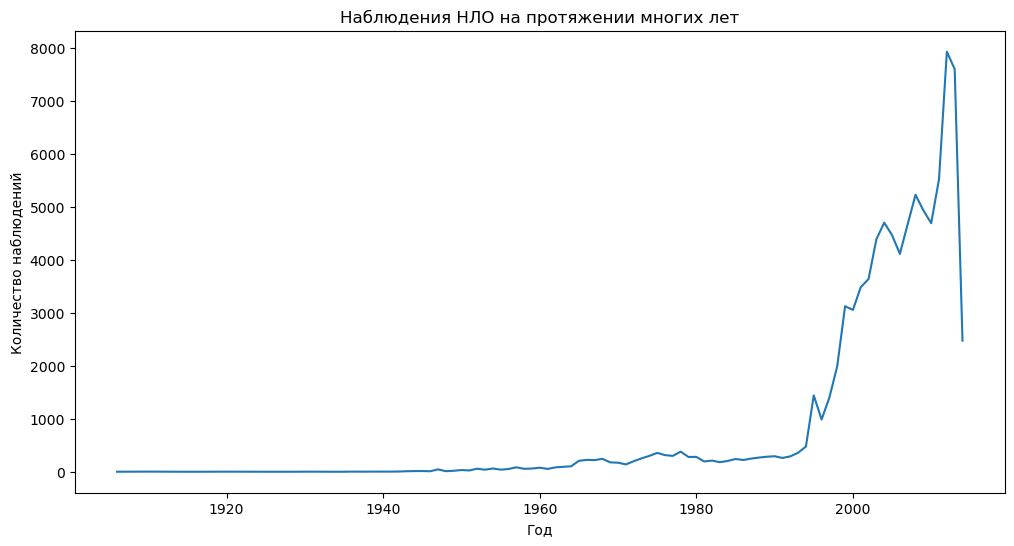

In [841]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_counts, x='year', y='count')
plt.title('Наблюдения НЛО на протяжении многих лет')
plt.xlabel('Год')
plt.ylabel('Количество наблюдений')
plt.show()

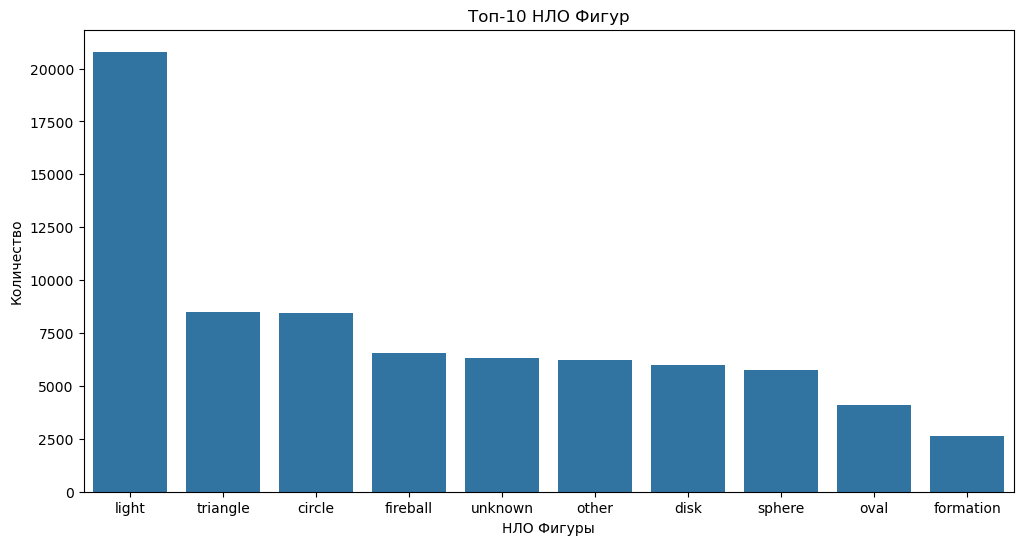

In [843]:
plt.figure(figsize=(12, 6))
ufo_shape_counts = df['shape'].value_counts().head(10)
sns.barplot(x=ufo_shape_counts.index, y=ufo_shape_counts.values)
plt.xlabel('НЛО Фигуры')
plt.ylabel('Количество')
plt.title('Топ-10 НЛО Фигур')
plt.show()

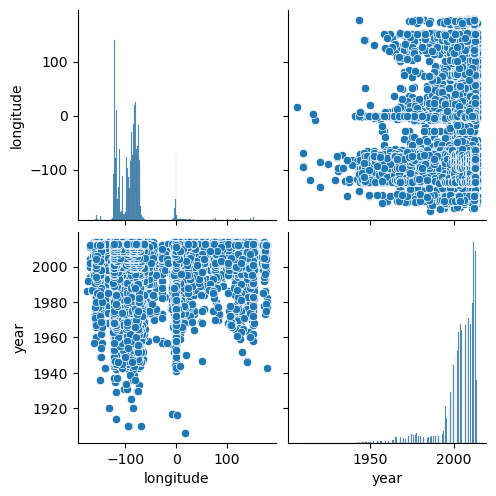

In [864]:
sns.pairplot(df)

## Общий вывод

- **Был загружен набор данных. Наблюдения показали, что в наборе данных есть пропуски и небольшое аномальное значение в datetime. Статистика показала, что значения во всех признаках находятся в пределах нормы.**
- **Проведена предобработка данных. Обработали пропущенные значения и аномальное значение.**
- **Проведен разведочный анализ данных.**